### Fill in your name, student id number and email address
#### name: Hiba Daafane
#### student id: 2208046
#### email: hidaaf@utu.fi

## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

The data set utilised in this exercise is a simplified and downsampled version of a knowledge discovery and data mining competition data set. The data will be available on the course's Moodle page. For those who are interested, the original data can be found at https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html. However, please make sure to **use the version on Moodle** as `ex3_network_data.csv`. The data is described below.

The data set contains samples of network activity simulated in a military network environment. There are different types of malicious activity, and also activity that is considered normal. It is **not necessary** to understand the details of the data set in order to complete the exercise.

In addition to normal activity, there are 3 types of malicious activity - denial of service, unauthorized remote login, and network probing (e.g. port scanning) - simulated in a military network environment. There are 500 samples of each class. There are 6 numeric features, described below:

`src_bytes`: number of bytes from source to destination\
`dst_bytes`: number of bytes from destination to source\
`duration`: length of connection (seconds)\
`count`: number of connections to the same host as the current connection in the past two seconds\
`serror_rate`: percentage of connections that have SYN errors\
`rerror_rate`: percentage of connections that have REJ errors

In real applications, visualizing and cleaning the data are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

Please consider the following things when returning your notebook:

 - As in the two previous exercises, the grading scale is failed/passed/passed with honors.
 
 - For a passing grade each part of the exercise, except for the BONUS, must be completed, and all questions should be answered. Some mistakes are allowed as long as you clearly attempt to solve all the exercises.
 
 - For doing both the exercise and the optional bonus task sufficiently well, you will be awarded one bonus point for the exam.
 
 - All the cells in the finished notebook should run without crashing. Please delete unnecessary cells. As a good rule of thumb, use "Restart and run all" on the finished notebook to make sure it runs without errors and produces the expected output.

 - Remember to comment your code to explain how it works and what you intend for it to do.
 
 - Answer the questions asked in the assignments in Markdown cells.
 
 - If you are having problems with this exercise, try an online search first, but don't just copy-paste any code you find. See exercise guidelines in the Moodle page of this course. If you can't find a solution to your problem, ask for advice in the course discussion forum on Moodle or contact oskari.s.heikkinen@utu.fi.
 
 - If/when you look things up during this exercise, please cite your sources (e.g. a link to a web page). It's better to cite too much than too little.

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional functionality here if you want.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings("ignore")
                        
%matplotlib inline

### Read the data

- Download the exercise 3 data on the Moodle page of this course.
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [2]:
data = pd.read_csv('ex3_network_data.csv')
data.head()

,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate,class
0,0,0,0,223,1.0,0.0,denial_of_service
1,1032,0,0,511,0.0,0.0,denial_of_service
2,520,0,0,511,0.0,0.0,denial_of_service
3,1032,0,0,510,0.0,0.0,denial_of_service
4,520,0,0,448,0.0,0.0,denial_of_service


In [3]:
data.describe()

,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000
mean,402.324500,382.56600,20.246500,111.158000,0.059415,0.14014
std,464.815917,861.81793,241.867267,198.399713,0.234554,0.34661
min,0.000000,0.00000,0.000000,1.000000,0.000000,0.00000
25%,8.000000,0.00000,0.000000,1.000000,0.000000,0.00000
50%,286.500000,0.00000,0.000000,2.000000,0.000000,0.00000
75%,748.000000,146.00000,0.000000,105.250000,0.000000,0.00000
max,4703.000000,4982.00000,4776.000000,511.000000,1.000000,1.00000


### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 
 - Does it look like there are clear clusters? Don't worry if they're hard to see.

In [4]:
# Z score standarddization on the feutures
feautures = data.drop('class', axis = 1)
sc=StandardScaler()
scale = sc.fit_transform(feautures)

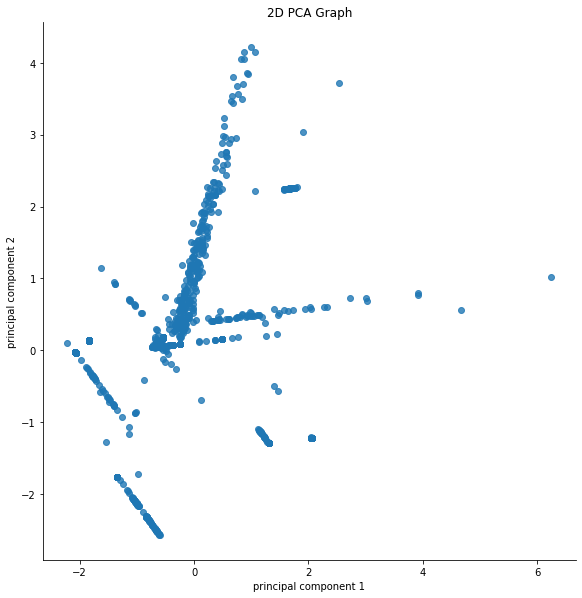

In [5]:
# PCA
pca = PCA(n_components=2)
x = scale
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

ax = sns.lmplot(x='principal component 1', y='principal component 2', data=principalDf, fit_reg=False, height=8, aspect=1)
plt.title('2D PCA Graph')
plt.show()

<font color = red> ***While maybe it's not quite apparent we can notice at least 3 distinguishable clusters from this plot, a first cluster in the upper part pf the plot, along with the two clusters of data forming linear shapes.***

Because clustering is an unsupervised learning method, the `class` column is completely unnecessary for most of these tasks. You will only need the `class` column in **Part 4**, where it's used to compute a performance metric and to visually compare clustering results to the classes.

### Part 2a: Agglomerative hierarchical clustering
 
 - Cluster the data into 4 clusters using agglomerative hierarchical clustering. Try different values for the "linkage" parameter.
 
 - Use the z-score standardized 6-dimensional data for clustering - not the principal components!
 
 - What is the significance of the linkage criterion in a hierarchical clustering algorithm?
 
 - Evaluate the clustering performance for each linkage criterion using a metric called "silhouette score".
 
 - What does silhouette score quantify and how is it computed?

In [6]:
model_ward = AgglomerativeClustering(n_clusters=4, linkage="ward")
model_complete = AgglomerativeClustering(n_clusters=4, linkage="complete")
model_average = AgglomerativeClustering(n_clusters=4, linkage="average")
model_single = AgglomerativeClustering(n_clusters=4, linkage="single")

model_ward.fit(scale)
model_complete.fit(scale)
model_average.fit(scale)
model_single.fit(scale)

score_ward = silhouette_score(scale, model_ward.labels_, metric='euclidean')
score_complete = silhouette_score(scale, model_complete.labels_, metric='euclidean')
score_average = silhouette_score(scale, model_average.labels_, metric='euclidean')
score_single = silhouette_score(scale, model_single.labels_, metric='euclidean')

In [7]:
print('Silhouette Score linkage = "ward": %.3f' % score_ward)
print('Silhouette Score linkage = "complete": %.3f' % score_complete)
print('Silhouette Score linkage = "average": %.3f' % score_average)
print('Silhouette Score linkage = "single": %.3f' % score_single)

Silhouette Score linkage = "ward": 0.630
Silhouette Score linkage = "complete": 0.482
Silhouette Score linkage = "average": 0.624
Silhouette Score linkage = "single": 0.729


<font color = red> ***- In a hierarchical clustering algorithm, the linkage criterion can influence the shape of the clusters, because hierarchical clustering algorithm brings two points together in a cluster if they're 'close', and the linkage criterion works as a condition on how the classifier will compute the distance between a number of data points as a function of the pairwise distances. 
<br> - In iur example specifying the linkage criterion to 'single' resulted into he highest silhouette score and thus the best classifier
<br> - Silhouette score is used to evaluate the performance of a clustering algorithm. Its value quantify between -1 and 1. the closer it is to 1 the more the clusters are clearly distinguished from each other.
<br> - Silhouette Score = (b-a)/max(a,b), where a= average distance between each point in a cluster. b= average distance between all clusters.***

### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using both `average` and `complete` linkage, and plot the dendrograms using scipy.cluster.hierarchy.dendrogram).
 - Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - How do you interpret the dendrograms? How do they differ?

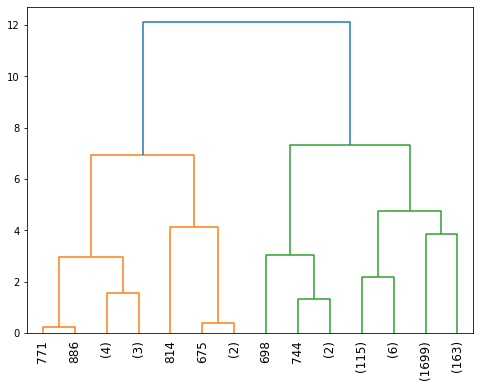

In [21]:
clusters_average = linkage(scale, method="average")
plt.figure(figsize=(8, 6))
dendrogram_average = dendrogram(clusters_average, truncate_mode = 'level', p = 3, leaf_rotation=90)

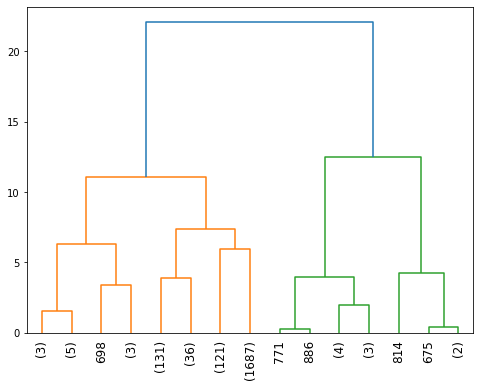

In [22]:
clusters_complete = linkage(scale, method="complete")
plt.figure(figsize=(8, 6))
dendrogram_complete = dendrogram(clusters_complete, truncate_mode = 'level', p = 3, leaf_rotation=90)

<font color = red> ***We can see that both dendograms produce two different clusters, from the same set of original data points***

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Use 4 clusters.
 - Evaluate the clustering performance using silhouette score.
 - Experiment with some other numbers of clusters. Does the data fit better into a different number of clusters according to silhouette score?

In [14]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit_predict(scale)
score_kmeans = silhouette_score(scale, kmeans.labels_, metric='euclidean')
print('Silhouette Score kmeans: %.3f' %score_kmeans)

Silhouette Score kmeans: 0.634


In [9]:
c = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(scale)
    c.append(silhouette_score(scale, kmeans.labels_, metric='euclidean'))

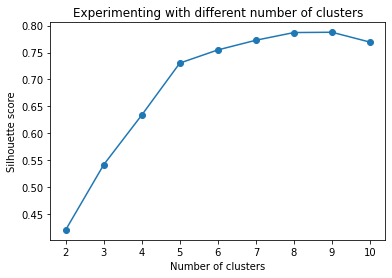

In [10]:
plt.plot(range(2,11), c, marker='o')
plt.title('Experimenting with different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

<font color = red> ***It looks like the silhouette score is maximized at the number of clusters equal to 8, however in order to make a confident conclusion about the optimal number of clusters we should support this analysis with the elbow method***

#### Rand score briefly described

Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
"Adjusted Rand index" is corrected for chance by using maximum and expected values of Rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)

###  Part 4a: Compare the clusters with the true labels (hierarchical clustering)
 
 - Cluster the data into 4 clusters using agglomerative hierarchical clustering.
 - Choose the linkage criterion that had the best silhouette score performance in Part 2a.
 - Visualize the data again using PCA, this time coloring the scatter plot based on the true class labels. Visually compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 - For an objective evaluation of the clustering, compute the adjusted Rand score (use the scikit-learn implementation) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 - If the results seem unimpressive, don't get discouraged - clustering "real life" data sets to match classes is a difficult task, and a low Rand score does not necessarily mean that you have made a mistake.

In [15]:
model_cls = AgglomerativeClustering(n_clusters=4, linkage="single")
model_cls.fit_predict(scale)

#create a DataFrame containing original data, PCA results and clustering results
data_pca_hierarchical = pd.concat([data.reset_index(drop = True), principalDf], axis =1)
#pd.DataFrame(principalComponents)
data_pca_hierarchical['predicted labels'] = model_cls.labels_

In [16]:
data_pca_hierarchical.head()

,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate,class,principal component 1,principal component 2,predicted labels
0,0,0,0,223,1.0,0.0,denial_of_service,-0.784767,-2.372303,0
1,1032,0,0,511,0.0,0.0,denial_of_service,2.056440,-1.222154,0
2,520,0,0,511,0.0,0.0,denial_of_service,1.306228,-1.295604,0
3,1032,0,0,510,0.0,0.0,denial_of_service,2.053927,-1.219385,0
4,520,0,0,448,0.0,0.0,denial_of_service,1.147854,-1.121159,0


Text(0.5, 0.98, 'Comparing true labels with predicted clusters - agglomerative hierarchical clustering')

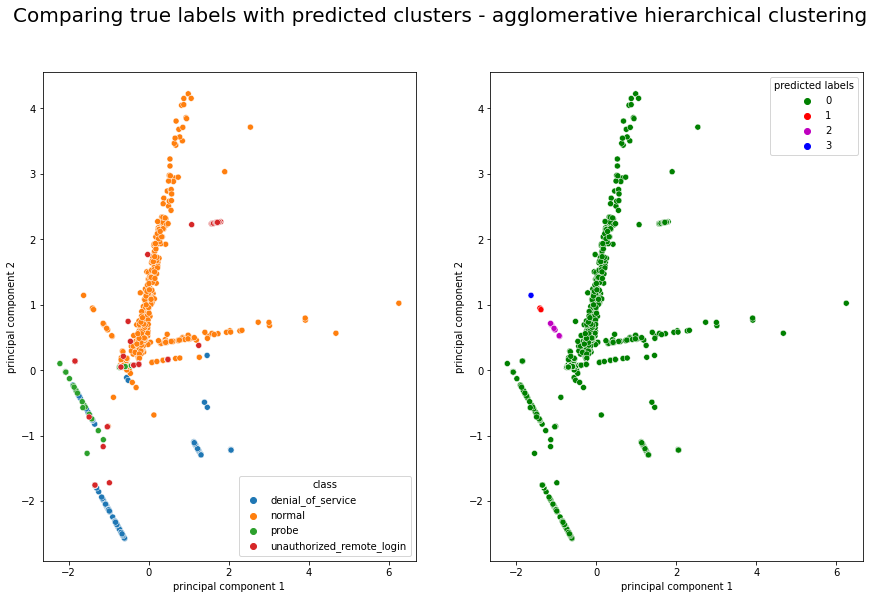

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (14.7, 9))

sns.scatterplot(data = data_pca_hierarchical, x = 'principal component 1', y = 'principal component 2',hue ='class',ax=axes[0])
sns.scatterplot(data = data_pca_hierarchical, x = 'principal component 1', y = 'principal component 2',hue ='predicted labels',
                ax=axes[1], palette = ['g','r','m','b'])
fig.suptitle("Comparing true labels with predicted clusters - agglomerative hierarchical clustering",fontsize=20)


In [42]:
adjusted_rand_score(data_pca_hierarchical['class'], data_pca_hierarchical['predicted labels'])
#value close to zero random labeling

0.00011807828578910034

<font color = red> ***From both the plot and the adjusted rand score (close o zero) we can clearly say that the clustering was almost as a random labeling , and the model didn't really perform very well.***

### Part 4b: Compare the clusters with true labels (_k_-means clustering)

 - Repeat the above steps, but this time using _k_-means clustering instead of hierarchical clustering.
 - Which performs better according to the adjusted Rand score?

Text(0.5, 0.98, 'Comparing true labels with predicted clusters - Kmeans clustering')

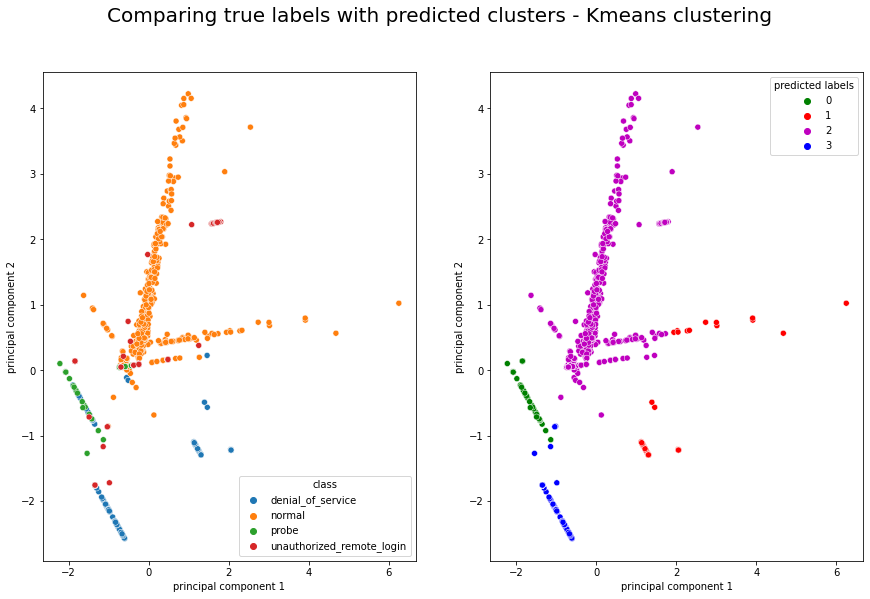

In [20]:
kmeans_cls = KMeans(n_clusters=4, random_state=123)
kmeans_cls.fit_predict(scale)

#create a DataFrame containing original data, PCA results and clustering results
data_pca_kmeans = pd.concat([data.reset_index(drop = True), principalDf], axis =1)
data_pca_kmeans['predicted labels'] = kmeans_cls.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (14.7, 9))

sns.scatterplot(data = data_pca_kmeans, x = 'principal component 1', y = 'principal component 2',hue ='class',ax=axes[0])
sns.scatterplot(data = data_pca_kmeans, x = 'principal component 1', y = 'principal component 2',hue ='predicted labels',
                ax=axes[1], palette = ['g','r','m','b'])
fig.suptitle("Comparing true labels with predicted clusters - Kmeans clustering",fontsize=20)


In [43]:
adjusted_rand_score(data_pca_kmeans['class'], data_pca_kmeans['predicted labels'])

0.2951546107072655

<font color = red> ***This time the results look a lot more promosing, while maybe not perfetly identical the predicted clusters are very close to the actual ones, and the visual results are also supported with a higher adjusted rand score*** 

### Part 5 (optional BONUS task): Clustering unlabeled data

In this task, you are working with data where the classes are not available, given as `ex3_seeds_data_BONUS.csv` on Moodle. [The original data set](https://archive.ics.uci.edu/ml/datasets/seeds) is available for for those who are interested, but **use the slightly modified data on Moodle** instead.

In general this is a very challenging and open-ended type of task that requires in-depth domain knowledge for meaningful results. Note, however, that in this exercise you are **not required** to research the domain in question (e.g. properties of different varieties of wheat). You might need to search for more information related to clustering in order to complete this exercise.

Some of the questions are open-ended and have no correct answer. It's enough to clearly show that you thought about the questions.

 - As in Part 1, z-score standardize the data, project it to 2 dimensions using PCA and visualize the result in a scatter plot.
 - Does the scatter plot look like the data might have a clustered structure? How many clusters do you see?
 - Decide, based on what you've learned about silhouette score and Rand score, which performance metric you should use in this task. Justify your choice.
 - Get an objective evaluation of how many clusters the data most likely has by using your chosen performance metric. Try both _k_-means clustering and agglomerative hierarchical clustering with different linkage criterions and see which performs best.
 - Visualize (with color) the best-performing result in the PCA scatter plot you created earlier.

In [25]:
data_bonus = pd.read_csv('ex3_seeds_data_BONUS.csv')

In [26]:
# Z score standarddization on the feutures
sc=StandardScaler()
scale_bonus = sc.fit_transform(data_bonus)

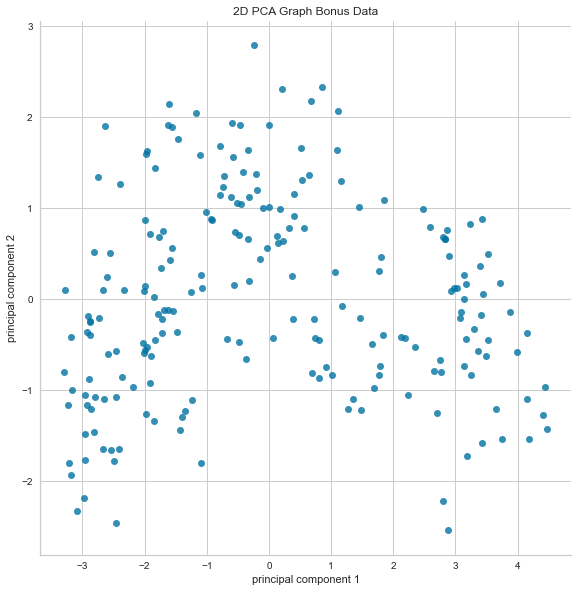

In [27]:
# PCA
pca = PCA(n_components=2)
x = scale_bonus
principalComponents_bonus = pca.fit_transform(x)
principalDf_bonus = pd.DataFrame(data = principalComponents_bonus
             , columns = ['principal component 1', 'principal component 2'])

ax = sns.lmplot(x='principal component 1', y='principal component 2', data=principalDf_bonus, fit_reg=False, height=8, aspect=1)
plt.title('2D PCA Graph Bonus Data')
plt.show()

<font color = red> ***Visually it's not really that apparent but I could say that the data could have between two to three clusters (left, middle, and right)***

<font color = red> ***Between silhouette and rand score it would be better to go with the silhouette score, because the rand score computes performance with labeled data, as it compares how the model performed compared to the actual values, and in our case, we have unlabeled data, thus silhouette score is the way to go.
<br> However, deciding the optimal number of clusters solely on the silhouette score is not optimal, and I will be using the yellowbrick library to visually show both the different silhouette score and the inertias for the elbow method.***	 

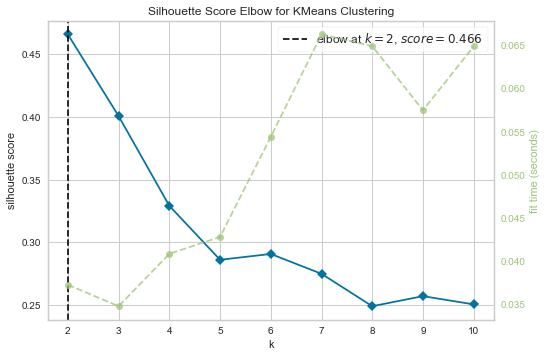

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
from yellowbrick.cluster import KElbowVisualizer
cls = KMeans()
v = KElbowVisualizer(cls, k=(2,11),metric='silhouette', timings= True)
v.fit(scale_bonus)        
v.show() 

KElbowVisualizer function documentation : 
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [50]:
kmeans_bonus = KMeans(n_clusters=2, random_state=123)
kmeans_bonus.fit_predict(scale_bonus)
score_kmeans_bonus = silhouette_score(scale_bonus, kmeans_bonus.labels_, metric='euclidean')
print('Silhouette Score kmeans: %.3f' %score_kmeans_bonus)

Silhouette Score kmeans: 0.466


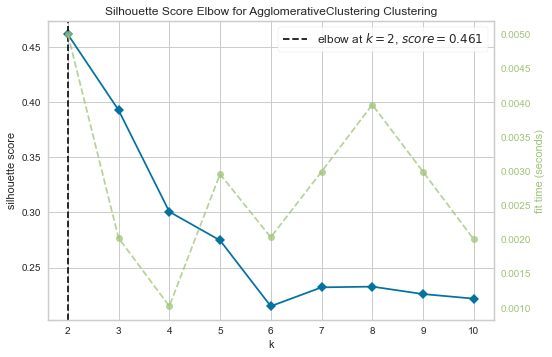

<AxesSubplot: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
#linkage 'ward'
model_ward = AgglomerativeClustering(linkage="ward")
v = KElbowVisualizer(model_ward, k=(2,11),metric='silhouette', timings= True)
v.fit(scale_bonus)       
v.show()  


In [43]:
ward_bonus = AgglomerativeClustering(n_clusters=2, linkage="ward")
ward_bonus.fit_predict(scale_bonus)
score_ward_bonus = silhouette_score(scale_bonus, ward_bonus.labels_, metric='euclidean')
print('Silhouette Score Agglomerative Clustering, linkage = "ward": %.3f' %score_ward_bonus)

Silhouette Score Agglomerative Clustering, linkage = "ward": 0.461


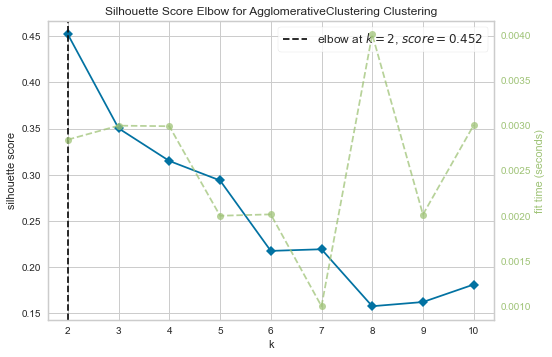

<AxesSubplot: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [44]:
#linkage 'complete'
model_complete = AgglomerativeClustering(linkage="complete")
v = KElbowVisualizer(model_complete, k=(2,11),metric='silhouette', timings= True)
v.fit(scale_bonus)        
v.show()  

In [45]:
complete_bonus = AgglomerativeClustering(n_clusters=2, linkage ="complete")
complete_bonus.fit_predict(scale_bonus)
score_complete_bonus = silhouette_score(scale_bonus, complete_bonus.labels_, metric='euclidean')
print('Silhouette Score Agglomerative Clustering, linkage = "complete": %.3f' %score_complete_bonus)

Silhouette Score Agglomerative Clustering, linkage = "complete": 0.452


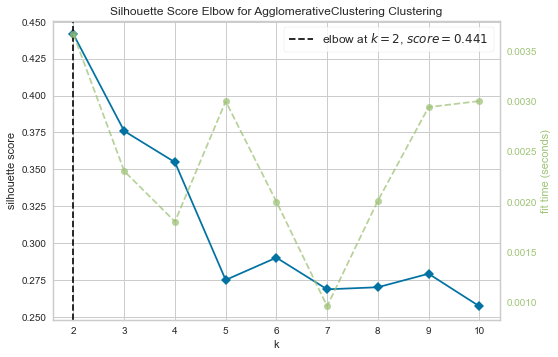

<AxesSubplot: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [46]:
#linkage 'average'
model_avg = AgglomerativeClustering(linkage="average")
v = KElbowVisualizer(model_avg, k=(2,11),metric='silhouette', timings= True)
v.fit(scale_bonus)        
v.show()  

In [47]:
average_bonus = AgglomerativeClustering(n_clusters=2, linkage ="average")
average_bonus.fit_predict(scale_bonus)
score_average_bonus = silhouette_score(scale_bonus, average_bonus.labels_, metric='euclidean')
print('Silhouette Score Agglomerative Clustering, linkage = "average": %.3f' %score_average_bonus)

Silhouette Score Agglomerative Clustering, linkage = "average": 0.441


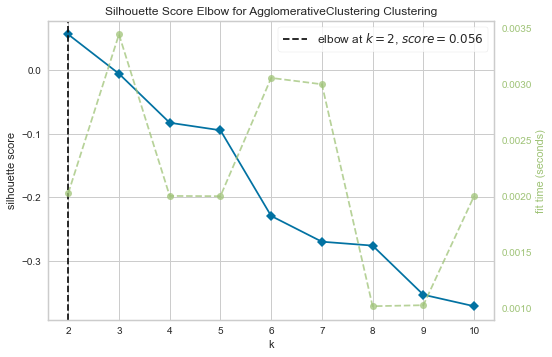

<AxesSubplot: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [48]:
#linkage 'single'
model_single = AgglomerativeClustering(linkage="single")
v = KElbowVisualizer(model_single, k=(2,11),metric='silhouette', timings= True)
v.fit(scale_bonus)        
v.show()  

In [49]:
single_bonus = AgglomerativeClustering(n_clusters=2, linkage ="single")
single_bonus.fit_predict(scale_bonus)
score_single_bonus = silhouette_score(scale_bonus, single_bonus.labels_, metric='euclidean')
print('Silhouette Score Agglomerative Clustering, linkage = "single": %.3f' %score_single_bonus)

Silhouette Score Agglomerative Clustering, linkage = "single": 0.056


<AxesSubplot: xlabel='principal component 1', ylabel='principal component 2'>

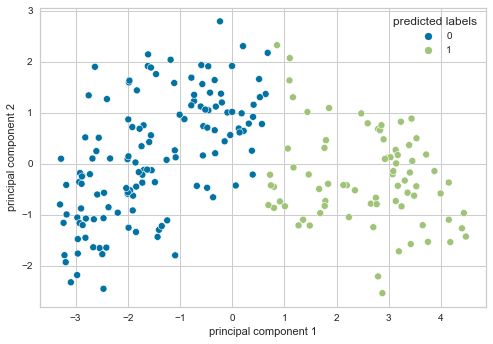

In [51]:
# best performing model is Kmeans with a Silhouette Score = 0.466
kmeans_bonus = KMeans(n_clusters=2, random_state=123)
kmeans_bonus.fit_predict(scale_bonus)

principalDf_bonus['predicted labels'] = kmeans_bonus.labels_

sns.scatterplot(data = principalDf_bonus, x = 'principal component 1', y = 'principal component 2',hue ='predicted labels')

<font color = red> ***The best results of the clustering show the existence of two distinguished clusters in our data***